# Gentle Introduction to Time Series Forecasting using ARIMA Model

Time Series forecasting is defined as taking a set of observation taken at specified times (usually of equal intervals) and using it to predict future values based on previous observed values. 
 


In [ ]:
!git clone https://github.com/cindyhcc/pds.git

Cloning into 'pds'...
remote: Enumerating objects: 10, done.
remote: Counting objects: 100% (10/10), done.
remote: Compressing objects: 100% (9/9), done.
remote: Total 10 (delta 1), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (10/10), done.


In [ ]:
import PIL
import matplotlib.pyplot as plt

! pip install --upgrade Cython
!pip install statsmodels==0.12.2
import statsmodels.api as sm


     |████████████████████████████████| 9.5 MB 4.6 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


#### Why is it important?

Time series analysis allows us to:

<strong>1.  </strong> Understand variability between time (t)

<strong>2.  </strong> Identify trends and characteristics of different timeframes and their impact on our indepenent variable
<!-- <li><strong>Moving Average </strong>is the usage of past errors to make predictions.
 -->

#### ARIMA Model
ARIMA model, short for AutoRegressive Integrated Moving Average, is a common statistical model used in time series forecasting to make predictions on time series data. It allows us to use our understanding of past values to predict
and plan for the future. 

Okay...what do you mean? 

Knew you'd ask that. Let's break down down (ARMIMA) AutoRegressive Integrated Moving Average.


ARIMA is actually simply a combination of the Auto Regression, Integration, and Moving Average model:


<li><strong>Auto Regression (AR) </strong> refers to the usage of past historical values to make predictions
<li><strong>Integration (I) </strong> is the use of differencing of raw observations (current observation - previous time step) in order to make the time series stationary.
<li><strong>Moving Average (MA) </strong>is the usage of past errors to make predictions.


Combined together, the AutoRegressive Integrated Moving Average is a model that uses past values and past errors to make future predictions on time series data. 


These 3 components are what makes up the 3 parameters of ARIMA model:
<!-- - [**d**](#Setup): order of differentiation/degree of differencing
- [**P**](#Setup): # of autoregressive lags in the model
- [**Q**](#Setup): Number of lagged forecast errors. The size/order of the moving average.  -->


<ul>
<li><strong>p:</strong> # of autoregressive lags in the model</li>
<li><strong>d:</strong> order of differentiation/degree of differencing</li>
<li><strong>q:</strong> Number of lagged forecast errors. The size/order of the moving average. </li>
</ul>



If 0 was assigned to any of the paramaters, we are indicating to not use that parameter in the model. 

This is one of the benefits of the ARIMA model. It gives us the flexibility to run a simple AR, I, or MA if we wish to do so rather than always having to run the entire ARIMA model. 

In this tutorial we will be building stock price prediction model using Google's past years historical stock prices from Yahoo Finance! [here](https://finance.yahoo.com/quote/GOOG/history?p=GOOG) to forecast its stock prices in the next 2 years.

The data is classified in date time and stock prices per month.

The model will be broken up into the following sections:
- [**Setup**](#Setup): Runs any imports and setups
- [**Test to Check Stationality**](#Test-to-Check-Stationality): Use rolling statistics and ADF test to check stationarity
- [**Tuning and Parameter Setting**](#Salaries): Adjust non-stationary series data and determine our p, q, d parameter
- [**Running our model**](#Running-Our-Model): Running our model and predicting future stock prices

## Setup:
The ARIMA model has the following assumptions:
1. The model has a constant variance and constant mean. 
2. The data must be <strong>stationary</strong> data.  

Let's start by importing some packages we will need later:

In [ ]:
# For linear algebra formulation later
import numpy as np 
%matplotlib inline
# For processing and reading our data from CSV file
import pandas as pd
# For visualizing our data
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
# for parsing string into datetime format later 
from datetime import datetime
# for evaluating our model later
from sklearn.metrics import mean_squared_error

In [ ]:
# loading our data
data = pd.read_csv("./pds/GOOG.csv")

In [ ]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-02-01,266.301849,272.727753,259.029083,262.416412,262.416412,104458675
1,2010-03-01,263.611908,293.041595,262.884644,282.501129,282.501129,168177416
2,2010-04-01,284.608215,297.803772,259.542175,261.868439,261.868439,146669702
3,2010-05-01,262.266968,265.464966,229.141129,241.908264,241.908264,163733825
4,2010-06-01,239.317978,253.674164,221.529648,221.644226,221.644226,120175163
...,...,...,...,...,...,...,...
115,2019-09-01,1177.030029,1248.300049,1163.199951,1219.000000,1219.000000,26899400
116,2019-10-01,1219.000000,1299.310059,1162.430054,1260.109985,1260.109985,28758300
117,2019-11-01,1265.000000,1335.529053,1260.500000,1304.959961,1304.959961,24923700
118,2019-12-01,1301.000000,1365.000000,1279.000000,1337.020020,1337.020020,27357100


We should also remove some columns we do not need

In [ ]:
columns = ['High', 'Low', 'Open', 'Volume', 'Adj Close']
data.drop(columns, axis=1, inplace=True)
data = data.sort_values('Date')

In [ ]:
# import datetime
# datetime.datetime.strptime
# parse string to datetime type 
# data['Date'] = pd.to_datetime(data['Date'])

data['Date'] = pd.to_datetime(data['Date'], infer_datetime_format = True)
# Set date as our index
indxdata = data.set_index(['Date'])
# rename our column index
indxdata=indxdata.rename(columns={"Data": "Data", "Close": "Closing Price"})
indxdata.head(5)
indxdata.columns

Index(['Closing Price'], dtype='object')

## Test to Check Stationality

Now, we need to run a test to check and ensure our series data is not stationary

Hold on a second...what is stationarity????? 0.0

No worries, we got you. 

A time series data is considered to have stationarity if it has any of the following characteristics:

<li>We can observe <strong>prominent seasonality</strong> in the series
<li>We see <strong>noticeable trends</strong> (upwards or downward slopes) and changing levels of increasing/decreasing variance.

To help with understanding, let's visualize our data

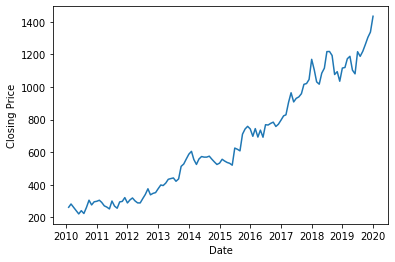

In [ ]:
sns.lineplot(data=indxdata, x="Date", y="Closing Price")

From the graph, we can see that the Google stock price dataset has a upward trend and if we were to calculate the mean it would not be constant. 

The data is therefore not going to be stationary.


We can confirm our suspicion using <strong>rolling statistic </strong> to test for stationarity.

<strong>Rolling statistic</strong> is a visualization technique computed by plotting the <strong> moving average </strong> or <strong>moving variance</strong> to see if it varies with time. 

<!-- In other words, we would need to tune and differenciate the dataset to convert it to stationary.
 -->
Let's try to visualize our rolling statistics:

pandas has its own built-in function that allows us to compute rolling window calculations.

Since our time unit is given monthly, we have a window of 12 months and will set our window = 12

For specifications of how to set the parameters, you can find more information here:
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rolling.html

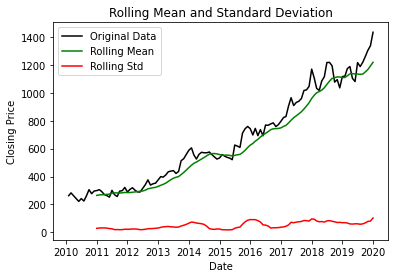

In [ ]:
original_data = plt.plot(indxdata, color='black', label = 'Original Data')
# calculate and plot the rolling mean
data_mean = plt.plot(indxdata.rolling(window=12).mean(), color='green', label = 'Rolling Mean')
# calculate and plot the rolling variance
data_std = plt.plot(indxdata.rolling(window=12).std(), color='red', label = 'Rolling Std')
plt.legend(loc='best')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Rolling Mean and Standard Deviation')
plt.show()

From the rolling statistic visualization, we can see an upward trend with increasing variance. Also our mean and standard deviation is not constant and our data is therefore NOT stationary.

Generally, most stock prices are not going to remain stationary since stock prices usually increase over time. If a firm's stock prices remain the same, they are likely not doing well !

Another way to test our hypothesis is to conduct the <strong>Augmented Dickey-Fuller</strong> (ADF) test on our dataset 

AD...what?

We're getting to it. You can think of ADF test as a hypothesis test with statististical significance to test if a series is stationary. 

ADF belongs to a "Unit Root Test", with the following equation:

<!-- im = PIL.Image.open(".img.png")
plt.imshow(im) -->

![img.png](attachment:img.png)

where:

<strong>y(t-1) </strong> = lag 1 of time series

<strong>delta Y(t-1) </strong> = first difference of the series at time (t-1)

<strong> alpha </strong> = unit root

The null hypothesis assumes alpha=1, meaning the unit root exists and therefore the series is not stationary.

We would conduct adfuller to run our hypothesis and our goal is to reject our null hypothesis

In the statsmodels package there is a "adfuller" built-in that returns us the following values:
<li><strong>p_value</strong>
<li><strong>t-statistics value</strong>
<li><strong>Number of lags considered for the test</strong>
<li><strong>The critical value cutoffs</strong>


We will be using the package to conduct our ADF test. In adfuller you will be required to enter the data series to test and method used to determine our lag length(autolag)

The default autolag method is "AIC" , and that is the method we will be using.

You can read more about adfuller here: 
https://www.statsmodels.org/dev/generated/statsmodels.tsa.stattools.adfuller.html

https://www.machinelearningplus.com/time-series/augmented-dickey-fuller-test/

In [ ]:
# Dickey-Fuller Test 
from statsmodels.tsa.stattools import adfuller
x= indxdata['Closing Price']
dftest = adfuller(x)
df_result = pd.Series(dftest[0:4], index=['Test Statistics', 'p-value', '# Lags Used', '# Observations Used'])
for k, v in dftest[4].items():  
    df_result['Critical Value (%s)' %k] = v 

In [ ]:
df_result

Test Statistics           0.892661
p-value                   0.992994
# Lags Used               0.000000
# Observations Used     119.000000
Critical Value (1%)      -3.486535
Critical Value (5%)      -2.886151
Critical Value (10%)     -2.579896
dtype: float64

From the summary statics, we can see that the p-value is > 0.05 and therefore not statistically significant. In other words, we cannot reject the null hypothesis.


**Note**: Aside from Rolling Statistics and Augmented Dickey-Fuller test, there are also other ways to test stationarity such as Kwiatkowski-Phillips-Schmidt-Shin (KPSS) Test. However, for the purpose of this tuturial, we will only cover Rolling Statistics and Augmented Dickey-Fuller test for now but it is good to keep other methods in mind.

## Tuning and Parameter Setting


Now that we have concluded our data is not stationary, we will attempt to transform our data by removing seasonality after logging it. Logging helps to make our data more "normal".

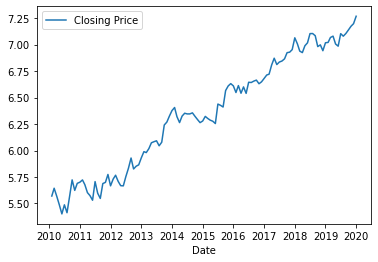

In [ ]:
# Normalize our series
log_indxdata = np.log(indxdata)
sns.lineplot(data=log_indxdata)

So statsmodels has a package called 'seasonal_decompose' that allows us to use time-series decompostion to break down our time series into trend, seasonality, and noise and visualize our data.

In [ ]:
!pip install statsmodels==0.12.2

In [ ]:
# import seasonal_decompose
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(log_indxdata)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid
fig, axes = plt.subplots(2, 2)

#create lineplot in each subplot
sns.set(rc = {'figure.figsize':(20,20)})
og=sns.lineplot(data=log_indxdata, ax=axes[0,0])
og.set_ylabel("Original Data")
t= sns.lineplot(data=trend, ax=axes[0,1])
t.set_ylabel("Trend")
s= sns.lineplot(data=seasonal, ax=axes[1,0])
s.set_ylabel("Seasonal")
r=sns.lineplot(data=residual, ax=axes[1,1])
r.set_ylabel("Residual")


NameError: ignored

After logging our series to reduce the magnitude and trend in the time series, we can compute the rolling average by taking time input for the past 12 months (1 year) and calculating a mean value for every point further ahead in series.

Once again, we will visualize our mean and variance time series and compare it with the previous time series.

Test Statistics        -1.231778e+01
p-value                 6.859337e-23
# Lags Used             0.000000e+00
# Observations Used     1.180000e+02
Critical Value (1%)    -3.487022e+00
Critical Value (5%)    -2.886363e+00
Critical Value (10%)   -2.580009e+00
dtype: float64

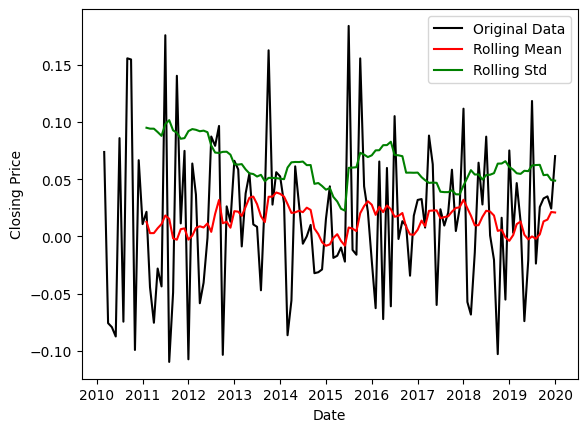

In [ ]:
shifted_data_log = log_indxdata - log_indxdata.shift()
shifted_data_log.dropna(inplace=True)

shifted_data_dftest = adfuller(shifted_data_log)
shifted_data_df_result = pd.Series(shifted_data_dftest[0:4], index=['Test Statistics', 'p-value', '# Lags Used', '# Observations Used'])

for k, v in shifted_data_dftest[4].items():  
    shifted_data_df_result['Critical Value (%s)' %k] = v 

movingavrg = shifted_data_log.rolling(window=12).mean()
movingavrg.dropna(inplace=True)
movingstd = shifted_data_log.rolling(window=12).std()
movingstd.dropna(inplace=True)
sns.reset_defaults()
og = sns.lineplot(data=shifted_data_log, x='Date', y = 'Closing Price', color = 'black', label = 'Original Data')
avg = sns.lineplot(data=movingavrg,x= 'Date', y = 'Closing Price', color = 'red', label= 'Rolling Mean')
std = sns.lineplot(data=movingstd, x= 'Date', y = 'Closing Price', color = 'green', label = 'Rolling Std')
shifted_data_df_result

Based on the results of our test statistics, we can see that after logging and eliminating trend, the p value is now statistically significant (less than 0.05) and the t statistic is less than the given critical values. From the line plot we can also see a more stable trend for rolling mean and rolling variance. Therefore, we can now reject the null hypothesis and conclude that the series data is stationary.

#### Parameter Setting
Now let's import acf and pacf from statsmodel to get our P & Q parameters

<strong>Autocorrelation</strong> is the correlation between points at time  t (Pₜ) and the point at (Pₜ₋₁). 

<strong>Partial autocorrelation </strong> is the point at time t (Pₜ) and the point (Pₜ₋ₖ) where k is any number of lags. Partial autocorrelation ignores all of the data in between both points.

You can read more about ACF and PACF here: 
https://online.stat.psu.edu/stat510/lesson/2/2.2

https://www.baeldung.com/cs/acf-pacf-plots-arma-modeling

In the context of our example, autocorrelation determines the relationship between this month's stock
prices and last month's stock price.

Let’s also take a quick look at an autocorrelation plot of the time series. We can also use the built-in function from pandas to compute our acf and pacf. The example below plots the autocorrelation and particial autocorrelation for a large number of lags in the time series.

<!-- ### Q3 Linear Regression

Now we are going to build a simple scikit-learn-like class for least squares linear regression.  Recall from lecture that the linear regression approach models the data as:
$$ y^{(i)} \approx \theta^T x^{(i)} $$
and the optimal $\theta$ is given by:
$$ \theta^* = (X^T X)^{-1}X^T y $$
using the notation described in the slides and course notes.  Recall, as mentioned in class, that you should use the `np.linalg.solve()` function rather than the `np.linalg.inv()` function to compute this solution.

Implement the class below, plus the `squared_error` function. -->

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:671: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1029: FutureWarning: The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs // 2 - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.
  FutureWarning,


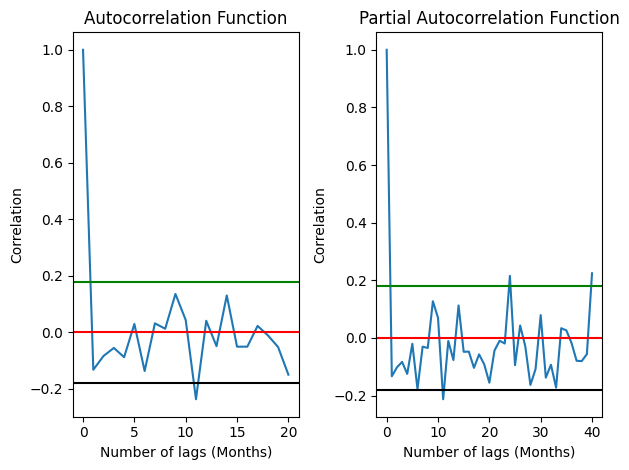

In [ ]:
# Plotting ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf

lag_acf = acf(shifted_data_log, nlags=20)
lag_pacf = pacf(shifted_data_log, method='ols')

# Plot ACF:
plt.subplot(121)
plt.plot(lag_acf)
plt.xlabel('Number of lags (Months)')
plt.ylabel('Correlation')
plt.axhline(y=0, color='red')
plt.axhline(y=-1.96/np.sqrt(len(shifted_data_log)), color='black')
plt.axhline(y=1.96/np.sqrt(len(shifted_data_log)), color='green')
plt.title('Autocorrelation Function')

# Plot PACF
plt.subplot(122)
plt.plot(lag_pacf)
plt.xlabel('Number of lags (Months)')
plt.ylabel('Correlation')
plt.axhline(y=0, color='red')
plt.axhline(y=-1.96/np.sqrt(len(shifted_data_log)), color='black')
plt.axhline(y=1.96/np.sqrt(len(shifted_data_log)), color='green')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()


From the ACF and PACF visualization, we can see that the first lag is postive and it first drops below 0 
when lag = 1. After the first lag it went back to positive. Therefore, we will use lag 1 as the moving average in our parameter. 

For PACF, we will use AR=1 since the first lag has a substantial drop. The goal is to minimize AIC and find as low a AIC as possitive and pick that moving average and autogregressive.

In [ ]:
lag_pacf

array([ 1.        , -0.1330197 , -0.10202566, -0.08322475, -0.12479257,
       -0.02031886, -0.17778133, -0.03033339, -0.03483857,  0.12737844,
        0.06972533, -0.21282974, -0.01053706, -0.07684467,  0.11268159,
       -0.04809271, -0.04747105, -0.10387342, -0.05711677, -0.09170904,
       -0.15542135, -0.04367233, -0.00974948, -0.01932658,  0.21543506,
       -0.09459887,  0.04307318, -0.02916836, -0.16310476, -0.10808802,
        0.07918881, -0.13782325, -0.0930997 , -0.17241719,  0.03367037,
        0.02624597, -0.01726926, -0.07939286, -0.08030327, -0.05603363,
        0.22437656])

In [ ]:
lag_acf

array([ 1.        , -0.13210193, -0.08316435, -0.0548912 , -0.08765258,
        0.02981131, -0.13661833,  0.03218511,  0.012944  ,  0.13609668,
        0.04387123, -0.23650056,  0.04111679, -0.04871814,  0.1308392 ,
       -0.05045813, -0.05046349,  0.02291271, -0.01033273, -0.05181054,
       -0.14948284])

## Running our Model

Now that we have adjusted our data for stationarity and determined our p,q,d parameters, we are (finally!)
ready to run our model. 

Once again, we will be using statsmodels' built-in ARIMA model to run our test.

After importing arima model we will feed it the parameters we have computed from the previous steps and fit our model.

From the visualization and plot results we can see that the model is a pretty good fit! To further affirm our
conclusion we can use different model evaluation methods such as mean squared error, residual mean squared error etc. to evaluate our accuracy. 

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be us

                             ARIMA Model Results                              
Dep. Variable:        D.Closing Price   No. Observations:                  119
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 164.222
Method:                       css-mle   S.D. of innovations              0.060
Date:                Wed, 13 Apr 2022   AIC                           -320.444
Time:                        22:53:39   BIC                           -309.327
Sample:                    03-01-2010   HQIC                          -315.930
                         - 01-01-2020                                         
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.0151      0.001     23.978      0.000       0.014       0.016
ar.L1.D.Closing Price     0.7673      0.062     12.406      0.000       0.646       0.888
ma.L1.D.

NameError: ignored

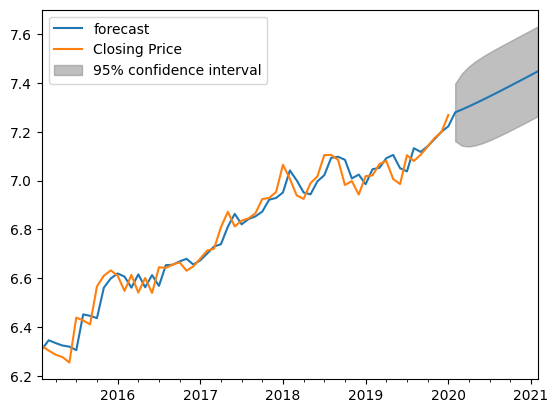

In [ ]:
# import the ARIMA model
from statsmodels.tsa.arima_model import ARIMA
import math

predictions_ARIMA= np.exp(log_indxdata)

# instantiate and set our 3 parameters (p,q,w)
model = ARIMA(log_indxdata, order=(1,1,1))

#fitting our model
results_ARIMA = model.fit(disp=-1)

print(results_ARIMA.summary())


results_ARIMA.plot_predict(60,132)
# Since we are predicting the last 2 years of stock prices, we can set the forecase paramter as 24 to assign the last 24 months as our prediction
two_yr_forecast = results_ARIMA.forecast(24)



train_data, test_data = predictions_ARIMA[:int(len(predictions_ARIMA)*0.8)], predictions_ARIMA[int(len(predictions_ARIMA)*0.8):]
# print(train_data)

fc, _, _ = results_ARIMA.forecast(24)

# print(len(fc),len(np.array(test_data['Closing Price'])))


mse = mean_squared_error(test_data['Closing Price'], fc)
mse = np.sum((fc-np.array(test_data['Closing Price']))**2)/24
# # mse = (np.sum(fc-np.array(test_data['Closing Price']))/24)**2
print('MSE: '+str(mse), mse1)
rmse = math.sqrt(mean_squared_error(test_data['Closing Price'], fc))
print('RMSE: '+str(rmse))



## Summary and references

This tutorial highlighted just a few techniques of conducting time series forecasting ARIMA model to analyze and forecast stock data in Python. For more detail and information about the libraries and packages used in this tutorial please see the linked below:  

1. ARIMA Model: https://www.statsmodels.org/devel/generated/statsmodels.tsa.arima.model.ARIMA.html
2. Rolling Statistics: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rolling.html
3. ADF:
https://www.statsmodels.org/dev/generated/statsmodels.tsa.stattools.adfuller.html ;
https://www.machinelearningplus.com/time-series/augmented-dickey-fuller-test/
4. Seasonal Decompose: https://www.statsmodels.org/dev/generated/statsmodels.tsa.seasonal.seasonal_decompose.html
5. General Time Series questions: https://stats.stackexchange.com/?tags=time-series
6. Stock prices data: https://finance.yahoo.com/quote/GOOG/history?p=GOOG
7. Fundamentals of Time Series: https://smac-group.github.io/ts/fundtimeseries.html

Thank you for reading! :D